# Deep CNN Model - CIFAR 10 Dataset

In [1]:
import keras
print(keras.__version__)

# upgraded keras to 2.0.4
# pip install --upgrade keras

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


2.0.4


## Define the Libraries for the CNN Model training

In [6]:
from keras import backend as k
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.datasets import mnist,cifar10
from keras.optimizers import RMSprop, Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
%matplotlib inline

### Define the parameters and Read Training Data

In [10]:
# Repititive steps as last time for training the model

OPTIMIZER = RMSprop()
NB_EPOCHS = 20   # decreasing the number of epochs to reduce the time for MLP, also for the RMSPROP and ADAM optimizers
SPLIT_PARAM = 0.2
NB_CLASSES = 10
VERBOSE =1
BATCH_SIZE = 128
DROPOUT_RATE = 0.25
NB_ROW, NB_COLS = 32, 32
NB_CHANNELS = 3
INPUT_SHAPE = (NB_ROW,NB_COLS, NB_CHANNELS)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
#k.set_image_dim_ordering("th")

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize the data
X_train /= 255
X_test /= 255

#convert labels to a one hot encoding vector
train_labels = np_utils.to_categorical(Y_train, NB_CLASSES)
test_labels = np_utils.to_categorical(Y_test, NB_CLASSES)

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Define the Model

In [8]:
model = Sequential()
# 1st layer of the DNN
model.add(Conv2D(32, (3,3), padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# 2nd layer of the DNN
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# Final dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

### Train the Model and get the Accuracy and Loss curves

In [11]:
model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=VERBOSE, 
                    validation_split=SPLIT_PARAM)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 39s - loss: 0.7210 - acc: 0.7494 - val_loss: 0.7559 - val_acc: 0.7427
Epoch 2/20
40000/40000 [==============================] - 39s - loss: 0.6268 - acc: 0.7840 - val_loss: 0.7382 - val_acc: 0.7464
Epoch 3/20
40000/40000 [==============================] - 39s - loss: 0.5673 - acc: 0.8043 - val_loss: 0.7827 - val_acc: 0.7341
Epoch 4/20
40000/40000 [==============================] - 39s - loss: 0.5091 - acc: 0.8220 - val_loss: 0.8877 - val_acc: 0.7140
Epoch 5/20
40000/40000 [==============================] - 39s - loss: 0.4609 - acc: 0.8407 - val_loss: 0.7699 - val_acc: 0.7759
Epoch 6/20
40000/40000 [==============================] - 39s - loss: 0.4228 - acc: 0.8552 - val_loss: 0.8643 - val_acc: 0.7385
Epoch 7/20
40000/40000 [==============================] - 39s - loss: 0.3836 - acc: 0.8658 - val_loss: 0.7991 - val_acc: 0.7621
Epoch 8/20
40000/40000 [==============================

 9888/10000 [============================>.] - ETA: 0s('Test Score: ', 1.3407701798915863)
('Test Accuracy: ', 0.74850000000000005)
['acc', 'loss', 'val_acc', 'val_loss']


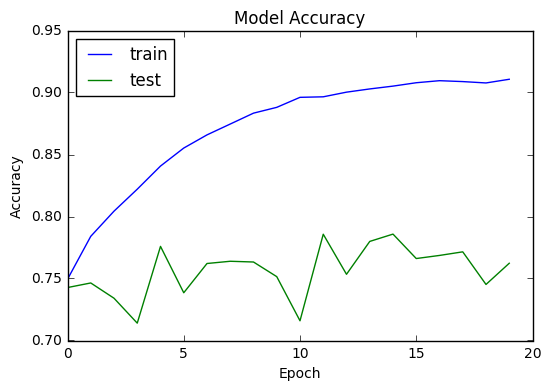

In [12]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

#list all data in history
print(history.history.keys())

#Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

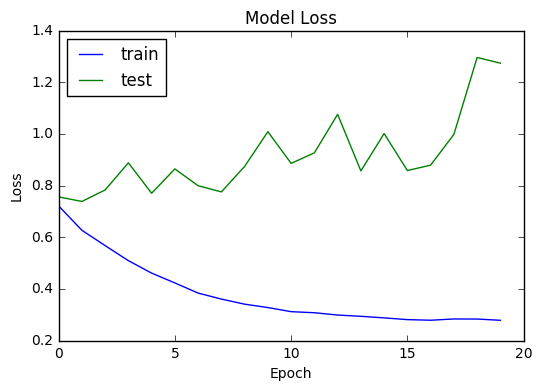

In [13]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save the Model and the Model Weights

In [15]:
#Saving the model json and the weights of the trainer model
model_json = model.to_json()
open('/home/ubuntu/abhik/cifar_10_deep_cnn.json', 'w').write(model_json)
# save the weights 
model.save_weights('/home/ubuntu/abhik/cifar_10_deep_cnn_weights.h5', overwrite=True)

### Create new images and try the same model to be trained

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
NUM_TO_AUGMENT = 5

# Repititive steps as last time for training the model

OPTIMIZER = RMSprop()
NB_EPOCHS = 50   # decreasing the number of epochs to reduce the time for MLP, also for the RMSPROP and ADAM optimizers
SPLIT_PARAM = 0.2
NB_CLASSES = 10
VERBOSE =1
BATCH_SIZE = 128
DROPOUT_RATE = 0.25
NB_ROW, NB_COLS = 32, 32
NB_CHANNELS = 3
INPUT_SHAPE = (NB_ROW,NB_COLS, NB_CHANNELS)

# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
# Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

# augumenting
print("Augumenting training set images ... ")
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Augumenting training set images ... 


In [4]:
model = Sequential()
# 1st layer of the DNN
model.add(Conv2D(32, (3,3), padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# 2nd layer of the DNN
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# Final dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

### Train the Model and get the Accuracy and Loss curves - On Generated Data , see the usage of fit_generator() method.

In [ ]:
#fit the dataget
datagen.fit(X_train)

model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train, Y_train, 
                               batch_size=32) ,steps_per_epoch=len(X_train) ,epochs=NB_EPOCHS, verbose=VERBOSE)

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

### Save the Model and the Model Weights

In [ ]:
#Saving the model json and the weights of the trainer model
model_json = model.to_json()
open('/home/ubuntu/abhik/cifar_10_new_images.json', 'w').write(model_json)
# save the weights 
model.save_weights('/home/ubuntu/abhik/cifar_10_new_imgs_weights.h5', overwrite=True)